In [34]:
import pandas as pd
import numpy as np

import seaborn as sns

from nltk.sentiment import SentimentIntensityAnalyzer

In [35]:
GoT_df = pd.read_csv('C:\\data files\\June2016 GOT.csv')

In [36]:
GoT_df.head()

,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status
0,M04th,Cutevl,reply,Wed Jun 01 06:32:54 +0000 2016,737894675277852674,@Cutevl انا اصداري اقدم شيء وعادي اخذ سيلفي ما...,[],False
1,aRnecutska,chris_voloshina,mentions,Wed Jun 01 06:34:15 +0000 2016,737895014991302656,RT @chris_voloshina: @aRnecutska моё мнение: к...,[],True
2,aRnecutska,aRnecutska,mentions,Wed Jun 01 06:34:15 +0000 2016,737895014991302656,RT @chris_voloshina: @aRnecutska моё мнение: к...,[],True
3,Macready1306,Macready1306,tweet,Wed Jun 01 06:35:56 +0000 2016,737895438624423937,I've never watched #GameOfThrones so I'd love ...,['GameOfThrones'],False
4,wahanapenulis,wahanapenulis,tweet,Wed Jun 01 06:38:50 +0000 2016,737896168445870080,I'm Tyrion. Discover which #GameOfThrones char...,['GameOfThrones'],False


In [37]:
#Convert Year column to a datetime objest
GoT_df['tweet date'] = pd.to_datetime(GoT_df['tweet date'])
GoT_df['date'] = GoT_df['tweet date'].dt.date

#Add a month, day, week and year value to the dataframe
GoT_df['day'] = GoT_df['tweet date'].dt.day
GoT_df['week'] = GoT_df['tweet date'].dt.week
GoT_df['month'] = GoT_df['tweet date'].dt.month
GoT_df['year'] = GoT_df['tweet date'].dt.year

C:\Users\tonyw\AppData\Local\Temp\ipykernel_1500\1789489786.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  GoT_df['week'] = GoT_df['tweet date'].dt.week


In [38]:
duplicateRows = GoT_df[GoT_df.duplicated()]

In [39]:
duplicateRows.head()

,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,month,year
64,mellanhead,YourLifeAfter25,mentions,2016-06-01 09:56:53+00:00,737946009339203584,RT @YourLifeAfter25: Enter @YourLifeAfter25's ...,"['GameOfThrones', 'Giveaway', 'ThronesYall']",True,2016-06-01,1,22,6,2016
161,GoddessVienna1,DennisHof,mentions,2016-06-01 13:37:49+00:00,738001609066569728,RT @DennisHof: BREAKING: @DennisHof unveils ne...,"['GOT', 'gameofthrones', 'sex']",True,2016-06-01,1,22,6,2016
215,iamJaivilbar,iamJaivilbar,tweet,2016-06-01 14:33:08+00:00,738015529927987201,So sad #GameofThrones https://t.co/E5rbJzw9tI,['GameofThrones'],False,2016-06-01,1,22,6,2016
375,KazantsevMaksim,HellasVeronaFC,mentions,2016-06-01 17:38:40+00:00,738062220928634880,RT @HellasVeronaFC: .@HellasVeronaFC comunica ...,[],True,2016-06-01,1,22,6,2016
529,HopeOfLovato,OriginalFunko,mentions,2016-06-01 20:41:02+00:00,738108115011391488,RT @OriginalFunko: RT &amp; follow @OriginalFu...,['GameofThrones'],True,2016-06-01,1,22,6,2016


In [40]:
duplicateRows = GoT_df[GoT_df.duplicated(['tweet'])]



In [41]:
duplicateRows.head()

,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,month,year
2,aRnecutska,aRnecutska,mentions,2016-06-01 06:34:15+00:00,737895014991302656,RT @chris_voloshina: @aRnecutska моё мнение: к...,[],True,2016-06-01,1,22,6,2016
7,scopece_marco,emiliaclarke,mentions,2016-06-01 06:44:16+00:00,737897535788961792,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,['GameofThrones'],True,2016-06-01,1,22,6,2016
15,smithstock24,jaaxed,mentions,2016-06-01 07:15:15+00:00,737905333004345344,RT @Crackmacs: Coolest. Gift. Ever. #hodor #ga...,"['hodor', 'gameofthrones']",True,2016-06-01,1,22,6,2016
23,Em_S97,FallonTonight,mentions,2016-06-01 07:37:07+00:00,737910835914407936,RT @FallonTonight: Kit Harington was pretty te...,['GameOfThrones'],True,2016-06-01,1,22,6,2016
25,RexMinaku,DebnamCarey,mentions,2016-06-01 07:45:27+00:00,737912933062152193,RT @Alejaz321: I nominate Alycia Debnam-Carey ...,"['VoTVActress', 'VoTVAwards']",True,2016-06-01,1,22,6,2016


In [42]:
duplicateRows.shape

(19243, 13)

In [43]:
GoT_df.shape

(59270, 13)

In [44]:
analyzer = SentimentIntensityAnalyzer()

In [45]:
GoT_df['polarity'] = GoT_df['tweet'].apply(lambda x: analyzer.polarity_scores(x))
GoT_df.tail(3)

,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,month,year,polarity
59267,jecssssss,jecssssss,tweet,2016-07-01 05:52:25+00:00,748756123277144068,"Just like Jon Snow, we know nothing 😂 #GameofT...",['GameofThronesTriviaGame'],False,2016-07-01,1,26,7,2016,"{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp..."
59268,toastedaquarius,toastedaquarius,tweet,2016-07-01 05:55:12+00:00,748756823730106368,Rewatching #GameofThrones has reminded me how ...,['GameofThrones'],False,2016-07-01,1,26,7,2016,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'comp..."
59269,Madrid__3,arwa1z,reply,2016-07-01 05:55:12+00:00,748756823721684994,@arwa1z عفوا لاتكلميني بعطيك بلوك,[],False,2016-07-01,1,26,7,2016,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [46]:
# Change data structure
GoT_df = pd.concat(
    [GoT_df.drop(['polarity'], axis=1), 
     GoT_df['polarity'].apply(pd.Series)], axis=1)
GoT_df.head(3)

,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,month,year,neg,neu,pos,compound
0,M04th,Cutevl,reply,2016-06-01 06:32:54+00:00,737894675277852674,@Cutevl انا اصداري اقدم شيء وعادي اخذ سيلفي ما...,[],False,2016-06-01,1,22,6,2016,0.0,1.0,0.0,0.0
1,aRnecutska,chris_voloshina,mentions,2016-06-01 06:34:15+00:00,737895014991302656,RT @chris_voloshina: @aRnecutska моё мнение: к...,[],True,2016-06-01,1,22,6,2016,0.0,1.0,0.0,0.0
2,aRnecutska,aRnecutska,mentions,2016-06-01 06:34:15+00:00,737895014991302656,RT @chris_voloshina: @aRnecutska моё мнение: к...,[],True,2016-06-01,1,22,6,2016,0.0,1.0,0.0,0.0


In [47]:
GoT_df['sentiment'] = GoT_df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
GoT_df.head()

,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,month,year,neg,neu,pos,compound,sentiment
0,M04th,Cutevl,reply,2016-06-01 06:32:54+00:00,737894675277852674,@Cutevl انا اصداري اقدم شيء وعادي اخذ سيلفي ما...,[],False,2016-06-01,1,22,6,2016,0.0,1.000,0.000,0.0000,neutral
1,aRnecutska,chris_voloshina,mentions,2016-06-01 06:34:15+00:00,737895014991302656,RT @chris_voloshina: @aRnecutska моё мнение: к...,[],True,2016-06-01,1,22,6,2016,0.0,1.000,0.000,0.0000,neutral
2,aRnecutska,aRnecutska,mentions,2016-06-01 06:34:15+00:00,737895014991302656,RT @chris_voloshina: @aRnecutska моё мнение: к...,[],True,2016-06-01,1,22,6,2016,0.0,1.000,0.000,0.0000,neutral
3,Macready1306,Macready1306,tweet,2016-06-01 06:35:56+00:00,737895438624423937,I've never watched #GameOfThrones so I'd love ...,['GameOfThrones'],False,2016-06-01,1,22,6,2016,0.0,0.641,0.359,0.8771,positive
4,wahanapenulis,wahanapenulis,tweet,2016-06-01 06:38:50+00:00,737896168445870080,I'm Tyrion. Discover which #GameOfThrones char...,['GameOfThrones'],False,2016-06-01,1,22,6,2016,0.0,1.000,0.000,0.0000,neutral


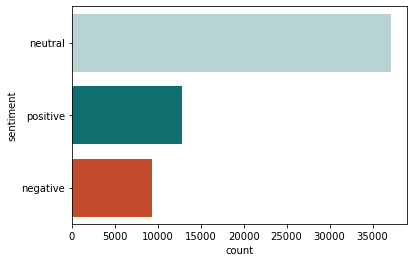

In [48]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=GoT_df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

In [49]:
print(GoT_df['sentiment'].value_counts()['positive'])
print(GoT_df['sentiment'].value_counts()['negative'])

12853
9288


In [50]:
GoT_positive = GoT_df.loc[GoT_df['sentiment'] == 'positive']
GoT_negative = GoT_df.loc[GoT_df['sentiment'] == 'negative']

In [51]:
GoT_positive.head()

,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,month,year,neg,neu,pos,compound,sentiment
3,Macready1306,Macready1306,tweet,2016-06-01 06:35:56+00:00,737895438624423937,I've never watched #GameOfThrones so I'd love ...,['GameOfThrones'],False,2016-06-01,1,22,6,2016,0.000,0.641,0.359,0.8771,positive
9,HodorRewards,jonsnowyy,mentions,2016-06-01 06:49:03+00:00,737898739558404096,RT @jonsnowyy: Well. I'm ready for GOT this we...,"['gameofthrones', 'got', 'jonsnow', 'youknowno...",True,2016-06-01,1,22,6,2016,0.000,0.730,0.270,0.6351,positive
12,6516460c32f4431,FallonTonight,mentions,2016-06-01 07:04:47+00:00,737902698985586688,RT @FallonTonight: Kit Harington was pretty te...,['GameOfThrones'],True,2016-06-01,1,22,6,2016,0.151,0.680,0.170,0.1007,positive
14,smithstock24,Crackmacs,mentions,2016-06-01 07:15:15+00:00,737905333004345344,RT @Crackmacs: Coolest. Gift. Ever. #hodor #ga...,"['hodor', 'gameofthrones']",True,2016-06-01,1,22,6,2016,0.000,0.568,0.432,0.7263,positive
15,smithstock24,jaaxed,mentions,2016-06-01 07:15:15+00:00,737905333004345344,RT @Crackmacs: Coolest. Gift. Ever. #hodor #ga...,"['hodor', 'gameofthrones']",True,2016-06-01,1,22,6,2016,0.000,0.568,0.432,0.7263,positive


In [52]:
GoT_negative.head()

,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,month,year,neg,neu,pos,compound,sentiment
6,scopece_marco,EmiliaClarkeNet,mentions,2016-06-01 06:44:16+00:00,737897535788961792,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,['GameofThrones'],True,2016-06-01,1,22,6,2016,0.136,0.864,0.000,-0.2960,negative
7,scopece_marco,emiliaclarke,mentions,2016-06-01 06:44:16+00:00,737897535788961792,RT @EmiliaClarkeNet: (Video) Emilia Clarke on ...,['GameofThrones'],True,2016-06-01,1,22,6,2016,0.136,0.864,0.000,-0.2960,negative
16,shahryar92,shahryar92,tweet,2016-06-01 07:15:43+00:00,737905450419650560,"I can't even... Forget #JonSnow, #MumtazQadri ...","['JonSnow', 'MumtazQadri', 'GameofThrones']",False,2016-06-01,1,22,6,2016,0.235,0.664,0.101,-0.4997,negative
48,tashhepstir,tashhepstir,tweet,2016-06-01 09:17:38+00:00,737936131786997760,"Gendry, I miss you #rowrowrowyourboat #gameoft...","['rowrowrowyourboat', 'gameofthrones']",False,2016-06-01,1,22,6,2016,0.286,0.714,0.000,-0.1531,negative
55,TheBrkNews,TheBrkNews,tweet,2016-06-01 09:41:00+00:00,737942012167618560,#htTweets RT htshowbiz: Hate and rage keep Ary...,"['htTweets', 'GameofThrones']",False,2016-06-01,1,22,6,2016,0.360,0.640,0.000,-0.8074,negative


In [53]:
GoT_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12853 entries, 3 to 59267
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   poster          12853 non-null  object             
 1   recipient       12852 non-null  object             
 2   relationship    12853 non-null  object             
 3   tweet date      12853 non-null  datetime64[ns, UTC]
 4   tweet id        12853 non-null  int64              
 5   tweet           12853 non-null  object             
 6   hashtags        12853 non-null  object             
 7   retweet status  12853 non-null  bool               
 8   date            12853 non-null  object             
 9   day             12853 non-null  int64              
 10  week            12853 non-null  int64              
 11  month           12853 non-null  int64              
 12  year            12853 non-null  int64              
 13  neg             12853 non-null 

In [54]:

#hardhome_pos = GoT_positive.query("date == '2016-06-01'")
#hardhome_neg = GoT_negative.query("date == '2016-06-01'")

#print(hardhome_pos['sentiment'].value_counts()['positive'])
#print(hardhome_neg['sentiment'].value_counts()['negative'])

In [55]:
#Get counts to have a look

GoT_positive = GoT_positive.groupby('date', as_index=False).count()
GoT_negative = GoT_negative.groupby('date', as_index=False).count()

In [56]:
GoT_positive.shape

(27, 18)

In [57]:
GoT_positive.head(27)

,date,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,day,week,month,year,neg,neu,pos,compound,sentiment
0,2016-06-01,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128
1,2016-06-02,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
2,2016-06-07,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
3,2016-06-08,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
4,2016-06-09,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
5,2016-06-10,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164
6,2016-06-11,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151
7,2016-06-12,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
8,2016-06-13,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816
9,2016-06-14,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226


In [58]:
GoT_negative.head(27)

,date,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,day,week,month,year,neg,neu,pos,compound,sentiment
0,2016-06-01,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106
1,2016-06-02,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
2,2016-06-07,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
3,2016-06-08,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
4,2016-06-09,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
5,2016-06-10,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
6,2016-06-11,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
7,2016-06-12,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
8,2016-06-13,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724
9,2016-06-14,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206
